In [1]:
import pandas as pd
import numpy as np
import os
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [3]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [4]:
data=pd.read_csv("C:\\Conifex\\LOG_2lines_2.csv")
# 2lines

In [5]:
data1=pd.read_csv("C:\\Conifex\\LOG_LRF5.csv")
#all

In [6]:
len(data1)

755

In [7]:
log_infeed_f=pd.read_csv("C:\\Conifex\\LOG_infeed_changes.csv")
log_infeed_f.head()

,Shiftnumber,SED_1,LED_1,Length_1,Sweep_1,Volume_1,SED_2,LED_2,Length_2,Sweep_2,Volume_2
0,42654.02,1.454234,1.572005,3.444101,0.791878,0.062217,2.548098,2.683306,2.866102,0.675244,0.166170
1,42655.01,1.378088,1.516939,3.527379,0.841223,0.059727,2.438841,2.642360,3.199555,0.777826,0.163690
2,42655.02,1.389896,1.587729,3.445274,0.864180,0.060045,2.416701,2.639434,3.182430,0.750845,0.158539
3,42656.01,1.386424,1.667981,3.313360,0.902701,0.059614,2.444835,2.647539,3.271742,0.703772,0.157563
4,42656.02,1.435640,1.691558,3.419746,0.842460,0.061937,2.448208,2.642503,3.246436,0.696215,0.159339


In [8]:
LRM=pd.read_csv("C:\\Conifex\\LRF_Canter_trimmer_sorter.csv")

In [9]:
log_infeed_f['Shiftnumber']=log_infeed_f['Shiftnumber'].astype(str)

In [10]:
LRF=LRM [['Shiftnumber','Shift code', 'Canter_LRF', 'Trimmer_LRF', 'SM_LRF']]


In [11]:
len(LRF)

529

In [12]:
LRF['Shiftnumber']=LRF['Shiftnumber'].astype(str)
LRF['Shift code']=LRF['Shift code'].astype(str)

LRF['Shiftnumber']=LRF['Shiftnumber']+".0"+LRF['Shift code']
LRF.head()

C:\Users\anooshiravan.sharabi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\anooshiravan.sharabi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\anooshiravan.sharabi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,Shiftnumber,Shift code,Canter_LRF,Trimmer_LRF,SM_LRF
0,42654.01,1,315.696225,304.443191,304.418262
1,42654.02,2,314.261620,302.932449,302.733226
2,42655.01,1,313.083547,310.038174,310.064456
3,42655.02,2,315.728407,314.327895,314.028032
4,42656.01,1,317.262999,309.767160,309.746683


In [13]:
BoardsPatterns=pd.read_csv("C:\\Conifex\\Canter-Boards_Pattern_with Clusters.csv")
BoardsPatterns.head()

,Unnamed: 0,2-10-10,2-10-12,2-10-14,2-10-16,2-10-18,2-10-20,2-10-8,2-12-12,2-12-14,...,2-8-10,2-8-12,2-8-14,2-8-16,2-8-18,2-8-20,2-8-6,2-8-8,BoardsPatternCluster,shiftnumber
0,0,0.001701,0.003785,0.009294,0.032390,0.003950,0.025291,0.000724,0.0,0.0,...,0.000593,0.001422,0.001352,0.006461,0.001383,0.012421,0.0,0.000439,2,42654.01
1,1,0.002036,0.003391,0.008718,0.040618,0.006035,0.037361,0.001265,0.0,0.0,...,0.002491,0.005150,0.007135,0.032985,0.007311,0.045332,0.0,0.002223,2,42654.02
2,2,0.002068,0.004047,0.007572,0.037771,0.003951,0.028443,0.001222,0.0,0.0,...,0.000738,0.000947,0.001960,0.009041,0.001649,0.011301,0.0,0.000652,2,42655.01
3,3,0.001818,0.004032,0.009087,0.040362,0.004184,0.028494,0.001086,0.0,0.0,...,0.001160,0.002033,0.003686,0.014377,0.003281,0.019813,0.0,0.001031,2,42655.02
4,4,0.001914,0.003819,0.009330,0.043390,0.004234,0.022415,0.001181,0.0,0.0,...,0.000922,0.001218,0.002066,0.008147,0.001893,0.012655,0.0,0.000576,2,42656.01


In [14]:
BoardsPatternsSorter=pd.read_csv("C:\\Conifex\\Sorter-Boards_Pattern.csv")
BoardsPatternsSorter.head()

,Shiftnumber,2.0*4.0*8.0,2.0*4.0*10.0,2.0*4.0*12.0,2.0*4.0*14.0,2.0*4.0*16.0,2.0*4.0*18.0,2.0*4.0*20.0,2.0*6.0*8.0,2.0*6.0*10.0,...,2.0*8.0*16.0,2.0*8.0*18.0,2.0*8.0*20.0,2.0*10.0*12.0,2.0*10.0*14.0,2.0*10.0*16.0,2.0*10.0*18.0,2.0*10.0*20.0,2.0*8.0*10.0,2.0*10.0*10.0
0,42654.01,0.010164,0.019370,0.029754,0.053726,0.154067,0.047150,0.157029,0.005855,0.012079,...,0.005496,0.001638,0.009827,0.003480,0.007365,0.030300,0.006142,0.013990,0.000409,0.001820
1,42654.02,0.008056,0.015726,0.023142,0.046288,0.129755,0.035411,0.148973,0.006394,0.011944,...,0.030824,0.008983,0.038690,0.004742,0.008037,0.040678,0.011541,0.024802,0.001431,0.001267
2,42655.01,0.012596,0.023117,0.035677,0.078104,0.144105,0.060774,0.170190,0.007135,0.013774,...,0.006945,0.002034,0.008476,0.003891,0.007147,0.032415,0.007166,0.017851,0.000616,0.001509
3,42655.02,0.008142,0.016757,0.027370,0.046906,0.138866,0.056561,0.168623,0.006762,0.012380,...,0.012229,0.003731,0.017395,0.004580,0.008679,0.040638,0.007495,0.017997,0.000592,0.001666
4,42656.01,0.009218,0.018435,0.025046,0.050495,0.153814,0.038658,0.127272,0.006766,0.014761,...,0.006891,0.002176,0.009671,0.003853,0.007999,0.041140,0.005780,0.013080,0.000434,0.001912


In [18]:
BoardsPatternsSorter['Shiftnumber']=BoardsPatternsSorter['Shiftnumber'].astype(str)

In [19]:
BoardsPatterns['shiftnumber']=BoardsPatterns['shiftnumber'].astype(str)


In [20]:
BoardsPatterns['Unnamed: 0']=BoardsPatterns['shiftnumber']
#BoardsPatterns=BoardsPatterns.drop(['Unnamed: 0'], axis=1)
BoardsPatterns.head()

,Unnamed: 0,2-10-10,2-10-12,2-10-14,2-10-16,2-10-18,2-10-20,2-10-8,2-12-12,2-12-14,...,2-8-10,2-8-12,2-8-14,2-8-16,2-8-18,2-8-20,2-8-6,2-8-8,BoardsPatternCluster,shiftnumber
0,42654.01,0.001701,0.003785,0.009294,0.032390,0.003950,0.025291,0.000724,0.0,0.0,...,0.000593,0.001422,0.001352,0.006461,0.001383,0.012421,0.0,0.000439,2,42654.01
1,42654.02,0.002036,0.003391,0.008718,0.040618,0.006035,0.037361,0.001265,0.0,0.0,...,0.002491,0.005150,0.007135,0.032985,0.007311,0.045332,0.0,0.002223,2,42654.02
2,42655.01,0.002068,0.004047,0.007572,0.037771,0.003951,0.028443,0.001222,0.0,0.0,...,0.000738,0.000947,0.001960,0.009041,0.001649,0.011301,0.0,0.000652,2,42655.01
3,42655.02,0.001818,0.004032,0.009087,0.040362,0.004184,0.028494,0.001086,0.0,0.0,...,0.001160,0.002033,0.003686,0.014377,0.003281,0.019813,0.0,0.001031,2,42655.02
4,42656.01,0.001914,0.003819,0.009330,0.043390,0.004234,0.022415,0.001181,0.0,0.0,...,0.000922,0.001218,0.002066,0.008147,0.001893,0.012655,0.0,0.000576,2,42656.01


In [21]:
BoardsPatterns.columns=['Shiftnumber', '2-10-10', '2-10-12', '2-10-14', '2-10-16', '2-10-18',
       '2-10-20', '2-10-8', '2-12-12', '2-12-14', '2-12-16', '2-12-18',
       '2-12-20', '2-4-10', '2-4-12', '2-4-14', '2-4-16', '2-4-18', '2-4-20',
       '2-4-6', '2-4-8', '2-6-10', '2-6-12', '2-6-14', '2-6-16', '2-6-18',
       '2-6-20', '2-6-6', '2-6-8', '2-8-10', '2-8-12', '2-8-14', '2-8-16',
       '2-8-18', '2-8-20', '2-8-6', '2-8-8', 'BoardsPatternCluster',
       'shiftnumber']
BoardsPatterns.head()

,Shiftnumber,2-10-10,2-10-12,2-10-14,2-10-16,2-10-18,2-10-20,2-10-8,2-12-12,2-12-14,...,2-8-10,2-8-12,2-8-14,2-8-16,2-8-18,2-8-20,2-8-6,2-8-8,BoardsPatternCluster,shiftnumber
0,42654.01,0.001701,0.003785,0.009294,0.032390,0.003950,0.025291,0.000724,0.0,0.0,...,0.000593,0.001422,0.001352,0.006461,0.001383,0.012421,0.0,0.000439,2,42654.01
1,42654.02,0.002036,0.003391,0.008718,0.040618,0.006035,0.037361,0.001265,0.0,0.0,...,0.002491,0.005150,0.007135,0.032985,0.007311,0.045332,0.0,0.002223,2,42654.02
2,42655.01,0.002068,0.004047,0.007572,0.037771,0.003951,0.028443,0.001222,0.0,0.0,...,0.000738,0.000947,0.001960,0.009041,0.001649,0.011301,0.0,0.000652,2,42655.01
3,42655.02,0.001818,0.004032,0.009087,0.040362,0.004184,0.028494,0.001086,0.0,0.0,...,0.001160,0.002033,0.003686,0.014377,0.003281,0.019813,0.0,0.001031,2,42655.02
4,42656.01,0.001914,0.003819,0.009330,0.043390,0.004234,0.022415,0.001181,0.0,0.0,...,0.000922,0.001218,0.002066,0.008147,0.001893,0.012655,0.0,0.000576,2,42656.01


In [22]:
BoardsPatterns=BoardsPatterns.drop('shiftnumber', axis=1)

In [23]:
BoardsPatterns1=BoardsPatterns[['Shiftnumber','BoardsPatternCluster']]

In [342]:
data['Shiftnumber']=data['Shiftnumber'].astype(str)

In [575]:
data1['Shiftnumber']=data1['Shiftnumber'].astype(str)
data1=data1.drop(['Unnamed: 0'], axis=1)
data1.head()

,Shiftnumber,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,42654.02,7.156054,6.7570,2.246040,0.801123,0.180416,4.6174,5.6020,6.7570,8.1000,...,0.326653,0.141933,-0.305395,-0.288313,-0.291339,0.178273,0.974521,-0.076654,-0.010106,0.035772
1,42655.01,6.729686,6.2445,2.091605,1.189140,1.318644,4.6030,5.3260,6.2445,7.4000,...,0.376929,0.195720,-0.293378,-0.249909,-0.259201,0.195256,0.974507,-0.093320,-0.029160,0.031978
2,42655.02,6.872406,6.4220,2.159928,1.007383,0.718331,4.5635,5.3885,6.4220,7.6660,...,0.296526,0.113182,-0.279614,-0.252114,-0.258284,0.154106,0.974736,-0.006393,0.056229,0.032844
3,42656.01,6.933441,6.4730,2.240025,0.928414,0.460196,4.5000,5.3636,6.4730,7.8000,...,0.353399,0.180188,-0.220416,-0.301240,-0.311174,0.142851,0.976729,0.034421,0.092060,0.033707
4,42656.02,6.660249,6.1395,2.126969,1.091534,0.885794,4.4470,5.2135,6.1395,7.3555,...,0.329227,0.149290,-0.250147,-0.271309,-0.282583,0.091093,0.974279,0.064864,0.134315,0.031121


In [474]:
Lastrun=pd.DataFrame()
Lastrun['Shiftnumber']=data1['Shiftnumber']
Lastrun1=Lastrun.iloc[1:,:]
print(len(Lastrun1))
data2=data1.iloc[:-1,1:]
print(len(data2))

754
754


In [478]:
data2.shape

(754, 92)

In [479]:
Lastrun1.shape

(754, 1)

In [496]:
#result=pd.DataFrame()
result = pd.concat([Lastrun1.reset_index(drop=True), data2.reset_index(drop=True)], axis=1,ignore_index=True)
#pd.concat([Lastrun1.reset_index(drop=True), data2.reset_index(drop=True)], axis=1)
result.head()
#result.shape

,Shiftnumber,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,42655.01,7.156054,6.7570,2.246040,0.801123,0.180416,4.6174,5.6020,6.7570,8.1000,...,0.326653,0.141933,-0.305395,-0.288313,-0.291339,0.178273,0.974521,-0.076654,-0.010106,0.035772
1,42655.02,6.729686,6.2445,2.091605,1.189140,1.318644,4.6030,5.3260,6.2445,7.4000,...,0.376929,0.195720,-0.293378,-0.249909,-0.259201,0.195256,0.974507,-0.093320,-0.029160,0.031978
2,42656.01,6.872406,6.4220,2.159928,1.007383,0.718331,4.5635,5.3885,6.4220,7.6660,...,0.296526,0.113182,-0.279614,-0.252114,-0.258284,0.154106,0.974736,-0.006393,0.056229,0.032844
3,42656.02,6.933441,6.4730,2.240025,0.928414,0.460196,4.5000,5.3636,6.4730,7.8000,...,0.353399,0.180188,-0.220416,-0.301240,-0.311174,0.142851,0.976729,0.034421,0.092060,0.033707
4,42657.01,6.660249,6.1395,2.126969,1.091534,0.885794,4.4470,5.2135,6.1395,7.3555,...,0.329227,0.149290,-0.250147,-0.271309,-0.282583,0.091093,0.974279,0.064864,0.134315,0.031121


In [495]:
#result.columns[0]=['Shiftnumber']
result = result.rename(columns={0: 'Shiftnumber'})

In [344]:
#data.replace([np.inf, -np.inf], np.nan)
#data=data.drop(['Unnamed: 0','LRF_5','LRF_3'], axis=1)
#data.replace([np.inf, -np.inf], np.nan)
data=data.drop(['Unnamed: 0'], axis=1)
data.head()

,Shiftnumber,Canter_East_log_M3,Canter_West_log_M3,SM_M3,SM_MFBM,LRF,1,2,3,4,...,161,162,163,164,165,166,167,168,169,170
0,42654.02,839.46,1375.80,2215.27,670636.00,302.73,5.740491,1.085692,0.248479,-0.684844,...,0.170508,-0.120065,-0.337828,0.145631,0.132663,0.112729,0.951007,-0.037183,0.058922,0.053924
1,42655.01,821.85,852.33,1674.18,519104.66,310.06,5.676546,1.013811,0.366003,-0.424115,...,0.260799,-0.012519,-0.335503,0.056406,0.034486,0.076614,0.955251,-0.034156,0.059734,0.052626
2,42655.02,987.01,1307.36,2294.38,720500.66,314.02,5.644510,1.033551,0.371212,-0.417509,...,0.189730,-0.096447,-0.322319,0.098895,0.084490,0.096748,0.951945,0.014704,0.104983,0.052239
3,42656.01,879.72,1399.19,2278.92,705890.66,309.74,5.560243,1.032088,0.413907,-0.522972,...,0.273115,-0.012272,-0.326197,0.134539,0.110349,0.119879,0.952090,-0.001721,0.092389,0.052941
4,42656.02,864.12,958.59,1822.72,569845.33,312.63,5.574015,1.051398,0.450650,-0.378977,...,0.242619,-0.065582,-0.386974,0.103374,0.090968,0.062570,0.944499,-0.028287,0.092484,0.053208


In [561]:
data2.head()

,Shiftnumber,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,42654.02,7.156054,6.7570,2.246040,0.801123,0.180416,4.6174,5.6020,6.7570,8.1000,...,0.326653,0.141933,-0.305395,-0.288313,-0.291339,0.178273,0.974521,-0.076654,-0.010106,0.035772
1,42655.01,6.729686,6.2445,2.091605,1.189140,1.318644,4.6030,5.3260,6.2445,7.4000,...,0.376929,0.195720,-0.293378,-0.249909,-0.259201,0.195256,0.974507,-0.093320,-0.029160,0.031978
2,42655.02,6.872406,6.4220,2.159928,1.007383,0.718331,4.5635,5.3885,6.4220,7.6660,...,0.296526,0.113182,-0.279614,-0.252114,-0.258284,0.154106,0.974736,-0.006393,0.056229,0.032844
3,42656.01,6.933441,6.4730,2.240025,0.928414,0.460196,4.5000,5.3636,6.4730,7.8000,...,0.353399,0.180188,-0.220416,-0.301240,-0.311174,0.142851,0.976729,0.034421,0.092060,0.033707
4,42656.02,6.660249,6.1395,2.126969,1.091534,0.885794,4.4470,5.2135,6.1395,7.3555,...,0.329227,0.149290,-0.250147,-0.271309,-0.282583,0.091093,0.974279,0.064864,0.134315,0.031121


In [562]:
result.head()

,Shiftnumber,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,42655.01,7.156054,6.7570,2.246040,0.801123,0.180416,4.6174,5.6020,6.7570,8.1000,...,0.326653,0.141933,-0.305395,-0.288313,-0.291339,0.178273,0.974521,-0.076654,-0.010106,0.035772
1,42655.02,6.729686,6.2445,2.091605,1.189140,1.318644,4.6030,5.3260,6.2445,7.4000,...,0.376929,0.195720,-0.293378,-0.249909,-0.259201,0.195256,0.974507,-0.093320,-0.029160,0.031978
2,42656.01,6.872406,6.4220,2.159928,1.007383,0.718331,4.5635,5.3885,6.4220,7.6660,...,0.296526,0.113182,-0.279614,-0.252114,-0.258284,0.154106,0.974736,-0.006393,0.056229,0.032844
3,42656.02,6.933441,6.4730,2.240025,0.928414,0.460196,4.5000,5.3636,6.4730,7.8000,...,0.353399,0.180188,-0.220416,-0.301240,-0.311174,0.142851,0.976729,0.034421,0.092060,0.033707
4,42657.01,6.660249,6.1395,2.126969,1.091534,0.885794,4.4470,5.2135,6.1395,7.3555,...,0.329227,0.149290,-0.250147,-0.271309,-0.282583,0.091093,0.974279,0.064864,0.134315,0.031121


In [566]:
len(data2)


754

In [184]:
data.columns=['Shiftnumber', 'mean(SED)', 'median(SED)','std(SED)','skew(SED)','kurtosis(SED)','0.1.quantile(SED)','0.3.quantile(SED)','0.5.quantile(SED)','0.7.quantile(SED)','0.9.quantile(SED)',
             'mean(LED)', 'median(LED)','std(LED)','skew(LED)','kurtosis(LED)','0.1.quantile(LED)','0.3.quantile(LED)','0.5.quantile(LED)','0.7.quantile(LED)','0.9.quantile(LED)',
             'mean(Length)', 'median(Length)','std(Length)','skew(Length)','kurtosis(Length)','0.1.quantile(Length)','0.3.quantile(Length)','0.5.quantile(Length)','0.7.quantile(Length)','0.9.quantile(Length)',
             'mean(Sweep)', 'median(Sweep)','std(Sweep)','skew(Sweep)','kurtosis(Sweep)','0.1.quantile(Sweep)','0.3.quantile(Sweep)','0.5.quantile(Sweep)','0.7.quantile(Sweep)','0.9.quantile(Sweep)',
              'mean(Volume)', 'median(Volume)','std(Volume)','skew(Volume)','kurtosis(Volume)','0.1.quantile(Volume)','0.3.quantile(Volume)','0.5.quantile(Volume)','0.7.quantile(Volume)','0.9.quantile(Volume)',
             'mean(CL)', 'median(CL)','std(CL)','skew(CL)','kurtosis(CL)','0.1.quantile(CL)','0.3.quantile(CL)','0.5.quantile(CL)','0.7.quantile(CL)','0.9.quantile(CL)',
             'mean(Tamper)', 'median(Tamper)','std(Tamper)','skew(Tamper)','kurtosis(Tamper)','0.1.quantile(Tamper)','0.3.quantile(Tamper)','0.5.quantile(Tamper)','0.7.quantile(Tamper)','0.9.quantile(Tamper)',
             'SED-LED','SED-Length','SED-Sweep','SED-Volume','SED-CL','SED-Tamper','LED-Length','LED-Sweep','LED-Volume','LED-CL','LED-Tamper','Length-Sweep','Length-Volume','Length-CL','Length-Tamper','Sweep-Volume','Sweep-CL','Sweep-Tamper','Volume-CL','Volume-Tamper',
             'CL-Tamper', 'General CL']

In [185]:
dataset=data.merge( log_infeed_f, on='Shiftnumber')

dataset.head()

,Shiftnumber,mean(SED),median(SED),std(SED),skew(SED),kurtosis(SED),0.1.quantile(SED),0.3.quantile(SED),0.5.quantile(SED),0.7.quantile(SED),...,SED_1,LED_1,Length_1,Sweep_1,Volume_1,SED_2,LED_2,Length_2,Sweep_2,Volume_2
0,42654.02,7.156054,6.7570,2.246040,0.801123,0.180416,4.6174,5.6020,6.7570,8.1000,...,1.454234,1.572005,3.444101,0.791878,0.062217,2.548098,2.683306,2.866102,0.675244,0.166170
1,42655.01,6.729686,6.2445,2.091605,1.189140,1.318644,4.6030,5.3260,6.2445,7.4000,...,1.378088,1.516939,3.527379,0.841223,0.059727,2.438841,2.642360,3.199555,0.777826,0.163690
2,42655.02,6.872406,6.4220,2.159928,1.007383,0.718331,4.5635,5.3885,6.4220,7.6660,...,1.389896,1.587729,3.445274,0.864180,0.060045,2.416701,2.639434,3.182430,0.750845,0.158539
3,42656.01,6.933441,6.4730,2.240025,0.928414,0.460196,4.5000,5.3636,6.4730,7.8000,...,1.386424,1.667981,3.313360,0.902701,0.059614,2.444835,2.647539,3.271742,0.703772,0.157563
4,42656.02,6.660249,6.1395,2.126969,1.091534,0.885794,4.4470,5.2135,6.1395,7.3555,...,1.435640,1.691558,3.419746,0.842460,0.061937,2.448208,2.642503,3.246436,0.696215,0.159339


In [634]:
dataset=pd.DataFrame()
#data:2lines log info
#dataset=LRF.merge( data, on='Shiftnumber')
#data1: all logs after correction of lenth in line 2 and adding general CL
dataset=LRF.merge( data1, on='Shiftnumber')
#dataset=dataset.merge( result, on='Shiftnumber')
#dataset=dataset.merge( log_infeed_f, on='Shiftnumber')
dataset=dataset.merge( BoardsPatterns, on='Shiftnumber')
#dataset=dataset.merge( BoardsPatternsSorter, on='Shiftnumber')
#dataset=dataset.merge( LRF, on='Shiftnumber')


#dataset=data.merge( BoardsPatternsSorter, on='Shiftnumber')
#dataset=data.merge( LRF, on='Shiftnumber')

In [635]:
dataset.shape

(523, 134)

In [636]:
dataset.shape

(523, 134)

In [637]:
#if dataset['dataset['target']=

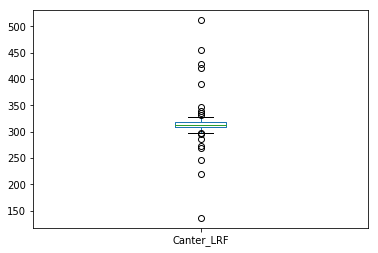

In [638]:
dataset['Canter_LRF'].plot(kind='box')
plt.show()

In [639]:
#dataset['LRF'].describe()

In [640]:
dataset.shape


(523, 134)

In [641]:
def outlier (arr):
    y=[]
    elements = np.array(arr)
    mean = np.mean(elements, axis=0)
    sd = np.std(elements, axis=0)
    for x in elements :
        if x> mean+2*sd:
            y.append('Outlier')
        elif x< mean-2*sd:
            y.append('Outlier')
        else: y.append('good')
    return (y)

In [642]:
dataset['Outlier']=outlier(dataset['Canter_LRF'])
dataset=dataset[dataset['Outlier']=='good']
dataset.shape



(513, 135)

In [643]:
dataset=dataset.drop(['Outlier'], axis=1)
dataset.shape

(513, 134)

In [644]:
def left(s):
    return s[:2]

def right(s):
    return s[-2:]

In [645]:
dataset['Shift']=dataset['Shiftnumber'].apply(right)
dataset['Shift']=dataset['Shift'].astype(int)
dataset.head()

,Shiftnumber,Shift code,Canter_LRF,Trimmer_LRF,SM_LRF,1,2,3,4,5,...,2-8-10,2-8-12,2-8-14,2-8-16,2-8-18,2-8-20,2-8-6,2-8-8,BoardsPatternCluster,Shift
0,42654.02,2,314.261620,302.932449,302.733226,7.156054,6.7570,2.246040,0.801123,0.180416,...,0.002491,0.005150,0.007135,0.032985,0.007311,0.045332,0.0,0.002223,2,2
1,42655.01,1,313.083547,310.038174,310.064456,6.729686,6.2445,2.091605,1.189140,1.318644,...,0.000738,0.000947,0.001960,0.009041,0.001649,0.011301,0.0,0.000652,2,1
2,42655.02,2,315.728407,314.327895,314.028032,6.872406,6.4220,2.159928,1.007383,0.718331,...,0.001160,0.002033,0.003686,0.014377,0.003281,0.019813,0.0,0.001031,2,2
3,42656.01,1,317.262999,309.767160,309.746683,6.933441,6.4730,2.240025,0.928414,0.460196,...,0.000922,0.001218,0.002066,0.008147,0.001893,0.012655,0.0,0.000576,2,1
4,42656.02,2,317.216152,312.973211,312.634523,6.660249,6.1395,2.126969,1.091534,0.885794,...,0.001084,0.001883,0.002939,0.009782,0.001952,0.010751,0.0,0.000757,2,2


In [646]:
dataset['Shiftnumber']=dataset['Shiftnumber'].astype(float)

In [647]:
#add date field and week number
from datetime import datetime
from datetime import timedelta
dataset['ShiftDate'] = datetime(1900, 1, 1) + pd.TimedeltaIndex(dataset['Shiftnumber'].astype(int)-2, unit='D')


In [648]:
def weekdaynumber(dt):
    #year, month, day = (int(x) for x in dt.split('-'))    
    answer = datetime.date(dt).weekday()
    return(answer)

In [649]:
def monthmaker(dt):
    #year, month, day = (int(x) for x in dt.split('-'))    
    answer = datetime.date(dt).month
    return(answer)

In [650]:
#dataset.head()
dataset['WeekDayIndex'] = dataset['ShiftDate'].apply(weekdaynumber)
dataset['MonthIndex'] = dataset['ShiftDate'].apply(monthmaker)

In [651]:
#dataset=dataset.drop('ShiftDate' ,axis=1)

In [652]:
q=pd.qcut(dataset["Canter_LRF"], 2, labels=["bad","good"])
#q
#print("Bins are {0}".format(q))
dataset['target'] = q
#data.head()
print(dataset.groupby('target').size())

target
bad     257
good    256
dtype: int64


In [653]:
dataset1=dataset.drop(['ShiftDate'], axis=1)
dataset1.head()

,Shiftnumber,Shift code,Canter_LRF,Trimmer_LRF,SM_LRF,1,2,3,4,5,...,2-8-16,2-8-18,2-8-20,2-8-6,2-8-8,BoardsPatternCluster,Shift,WeekDayIndex,MonthIndex,target
0,42654.02,2,314.261620,302.932449,302.733226,7.156054,6.7570,2.246040,0.801123,0.180416,...,0.032985,0.007311,0.045332,0.0,0.002223,2,2,1,10,good
1,42655.01,1,313.083547,310.038174,310.064456,6.729686,6.2445,2.091605,1.189140,1.318644,...,0.009041,0.001649,0.011301,0.0,0.000652,2,1,2,10,good
2,42655.02,2,315.728407,314.327895,314.028032,6.872406,6.4220,2.159928,1.007383,0.718331,...,0.014377,0.003281,0.019813,0.0,0.001031,2,2,2,10,good
3,42656.01,1,317.262999,309.767160,309.746683,6.933441,6.4730,2.240025,0.928414,0.460196,...,0.008147,0.001893,0.012655,0.0,0.000576,2,1,3,10,good
4,42656.02,2,317.216152,312.973211,312.634523,6.660249,6.1395,2.126969,1.091534,0.885794,...,0.009782,0.001952,0.010751,0.0,0.000757,2,2,3,10,good


In [654]:
#dataset1.columns

In [655]:
#print(dataset1.iloc[0,0:10])

In [656]:
#print(dataset1.iloc[0,90:100])

In [657]:
X=pd.DataFrame()
Y=pd.DataFrame()
X=dataset1.iloc[:,10:-1]
Y=dataset1.iloc[:,-1]

In [658]:
#import os
#path_d = 'C:\\Users\\anooshiravan.sharabi\\Desktop'
#dataset1.to_csv(os.path.join(path_d, 'LRF_Classificatin_dataset.csv'))

In [659]:
#array = Y.values
#X = array[:,0:4]
#Y = array
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [660]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [661]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('AdaB', AdaBoostClassifier()))
models.append(('GradientB', GradientBoostingClassifier()))
models.append(('QuadraticDis',QuadraticDiscriminantAnalysis()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.768293 (0.070900)
LDA: 0.836585 (0.043699)
KNN: 0.714634 (0.071568)


C:\Users\anooshiravan.sharabi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\anooshiravan.sharabi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\anooshiravan.sharabi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\anooshiravan.sharabi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\anooshiravan.sharabi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are col

CART: 0.780488 (0.077896)
NB: 0.802439 (0.064944)
RF: 0.839024 (0.067416)
AdaB: 0.856098 (0.027702)
GradientB: 0.865854 (0.046597)
QuadraticDis: 0.795122 (0.070013)


C:\Users\anooshiravan.sharabi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\anooshiravan.sharabi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\anooshiravan.sharabi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\anooshiravan.sharabi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\anooshiravan.sharabi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


SVM: 0.753659 (0.077475)


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [57]:
dataset1.head()

,Shiftnumber,Shift code,Canter_LRF,Trimmer_LRF,SM_LRF,mean(SED),median(SED),std(SED),skew(SED),kurtosis(SED),...,2-8-16,2-8-18,2-8-20,2-8-6,2-8-8,BoardsPatternCluster,Shift,WeekDayIndex,MonthIndex,target
0,42654.02,2,314.261620,302.932449,302.733226,7.153321,6.750,2.247761,0.800641,0.177787,...,0.032985,0.007311,0.045332,0.0,0.002223,2,2,1,10,good
1,42655.01,1,313.083547,310.038174,310.064456,6.726466,6.240,2.093197,1.188845,1.315433,...,0.009041,0.001649,0.011301,0.0,0.000652,2,1,2,10,good
2,42655.02,2,315.728407,314.327895,314.028032,6.869457,6.420,2.161626,1.006826,0.715102,...,0.014377,0.003281,0.019813,0.0,0.001031,2,2,2,10,good
3,42656.01,1,317.262999,309.767160,309.746683,6.930694,6.470,2.241707,0.927837,0.457205,...,0.008147,0.001893,0.012655,0.0,0.000576,2,1,3,10,good
4,42656.02,2,317.216152,312.973211,312.634523,6.657099,6.135,2.128594,1.091219,0.883093,...,0.009782,0.001952,0.010751,0.0,0.000757,2,2,3,10,good


In [58]:
X.columns

Index(['mean(SED)', 'median(SED)', 'std(SED)', 'skew(SED)', 'kurtosis(SED)',
       '0.1.quantile(SED)', '0.3.quantile(SED)', '0.5.quantile(SED)',
       '0.7.quantile(SED)', '0.9.quantile(SED)',
       ...
       '2-8-14', '2-8-16', '2-8-18', '2-8-20', '2-8-6', '2-8-8',
       'BoardsPatternCluster', 'Shift', 'WeekDayIndex', 'MonthIndex'],
      dtype='object', length=131)

In [59]:
feat_labels = X.columns


In [60]:
X=dataset1.iloc[:,5:-1]
y=dataset1.iloc[:,2]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
clf = RandomForestRegressor(n_estimators=2000, min_samples_split=2)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('mean(SED)', 0.001565312921651255)
('median(SED)', 0.00088914145871960687)
('std(SED)', 0.0014308716536531056)
('skew(SED)', 0.0012640942412799388)
('kurtosis(SED)', 0.0012675265397523894)
('0.1.quantile(SED)', 0.0014787389075437665)
('0.3.quantile(SED)', 0.0013768237964856189)
('0.5.quantile(SED)', 0.00098613308003665649)
('0.7.quantile(SED)', 0.00087441532533501752)
('0.9.quantile(SED)', 0.00081575043421954288)
('mean(LED)', 0.0012039600710790149)
('median(LED)', 0.00090372975504205322)
('std(LED)', 0.0015681008146529716)
('skew(LED)', 0.0012642096389349077)
('kurtosis(LED)', 0.0013886561111215074)
('0.1.quantile(LED)', 0.0012645736665165856)
('0.3.quantile(LED)', 0.0011886915711771463)
('0.5.quantile(LED)', 0.00083112173995704148)
('0.7.quantile(LED)', 0.0010030928097119734)
('0.9.quantile(LED)', 0.00069593378624546937)
('mean(Length)', 0.0021894637291951079)
('median(Length)', 0.00082742402174033262)
('std(Length)', 0.0033791513451303427)
('skew(Length)', 0.0031534812965952688)
('

In [ ]:
pd.read_csv("C:\\Conifex\\Sorter_DT_Reasons.csv")